<a href="https://colab.research.google.com/github/singhing/ml_repo_077-/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
train=xgb.DMatrix(x_train, label=y_train)
test=xgb.DMatrix(x_test, label=y_test)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
data['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
data.groupby('target').size()

target
0    138
1    165
dtype: int64

In [ ]:
data.shape

(303, 14)

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [ ]:
data['sex'].unique()

array([1, 0])

In [ ]:
data['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

**VISUALISING** **DATASET**

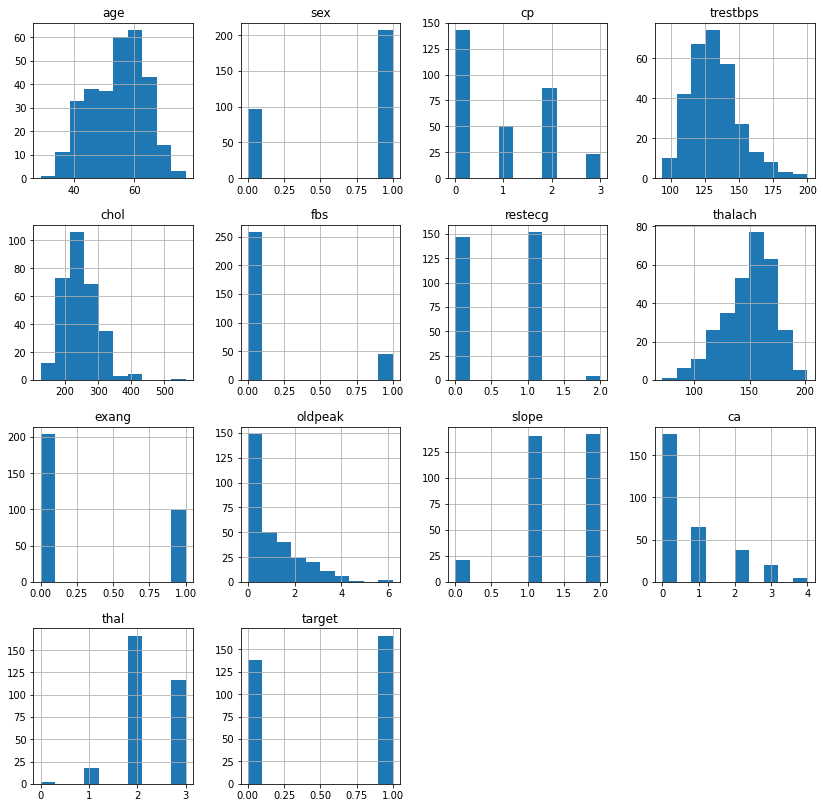

In [ ]:
data.hist(figsize=(14,14))
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


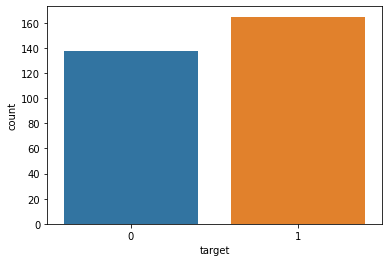

In [ ]:
count_disease=sns.countplot(x='target',data=data)
print(count_disease)


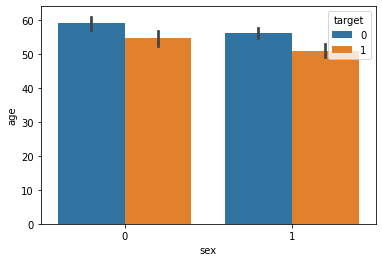

In [ ]:
sns.barplot(x=data['sex'], y=data['age'], hue=data['target'] )
plt.show()

<Figure size 360x360 with 0 Axes>

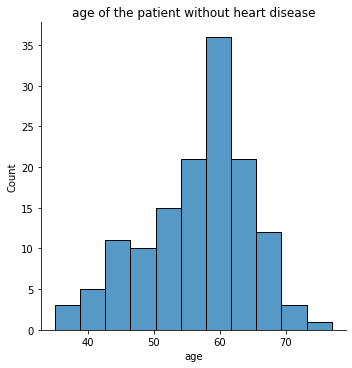

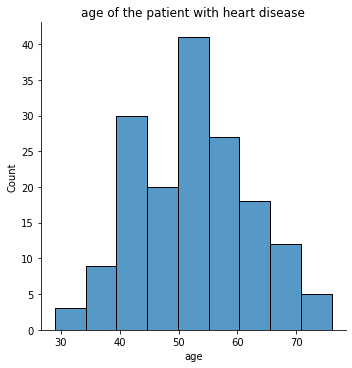

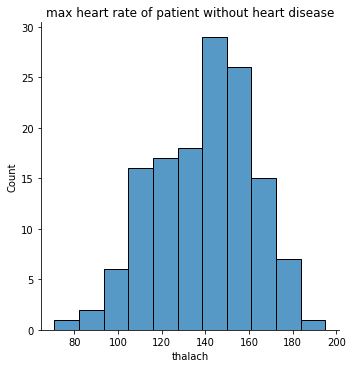

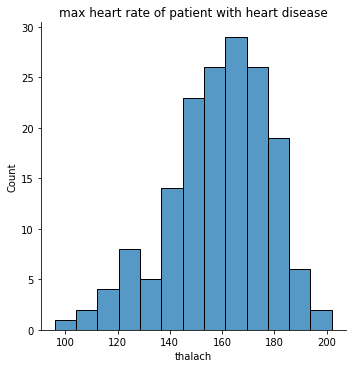

In [ ]:
#create four displots
plt.figure(figsize=(5,5))

sns.displot(data[data['target']==0].age)
plt.title("age of the patient without heart disease")


sns.displot(data[data['target']==1].age)
plt.title("age of the patient with heart disease")


sns.displot(data[data['target']==0].thalach)
plt.title("max heart rate of patient without heart disease")


sns.displot(data[data['target']==1].thalach)
plt.title("max heart rate of patient with heart disease")
plt.show()


<function matplotlib.pyplot.show>

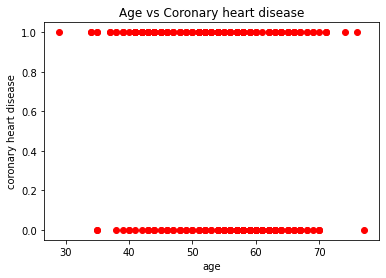

In [ ]:
plt.scatter(x=data['age'], y=data['target'], color='red')
plt.xlabel('age')
plt.ylabel('coronary heart disease')
plt.title('Age vs Coronary heart disease')
plt.show

<function matplotlib.pyplot.show>

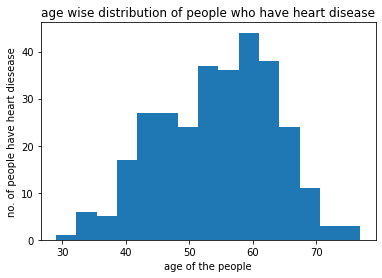

In [ ]:
plt.hist(data['age'], bins=15)
plt.xlabel("age of the people")
plt.ylabel("no. of people have heart diesease")
plt.title("age wise distribution of people who have heart disease")
plt.show

**DATA** **PREPROCESSING**

In [ ]:

X = data.drop(['target'],axis=1)
y= data['target']

In [ ]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [ ]:
scaled_X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
scaled_X.shape

(303, 13)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y, random_state=101, test_size=0.3, stratify=y)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=6)
adaboost=AdaBoostClassifier(base_estimator=model,n_estimators=500,learning_rate=0.3)
boostmodel=adaboost.fit(X_train,y_train)
y_pred=boostmodel.predict(X_test)



In [ ]:
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)

0.7802197802197802


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
model=svm.SVC(kernel='rbf',C=20,gamma='auto')
from xgboost import XGBClassifier

xg_boost=XGBClassifier(base_estimator=model,n_estimators=100,learning_rate=0.3,max_depth=8,random_state=50,objective='multi:softmax',booster='dart',num_class=6)
boostmodel=xg_boost.fit(X_train,y_train)
y_pred=boostmodel.predict(X_test)
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)


0.8131868131868132


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=100,criterion='gini',max_depth=8,max_features='auto',min_samples_split=8,bootstrap=True) 
from xgboost import XGBClassifier

xg_boost=XGBClassifier(base_estimator=rand_cls,n_estimators=100,learning_rate=0.3,max_depth=8,random_state=50,objective='multi:softmax',booster='dart',num_class=6)
boostmodel=xg_boost.fit(X_train,y_train)
y_pred=boostmodel.predict(X_test)
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)


0.8131868131868132


In [ ]:
from sklearn import svm
from xgboost import XGBClassifier
from sklearn import model_selection
clf=XGBClassifier
seed=128
num_trees=100
kfold=model_selection.KFold(n_splits=20,random_state=128,shuffle=True)
model=XGBClassifier(n_estimators=num_trees,random_state=seed)
results=model_selection.cross_val_score(model,X_test,y_test,cv=kfold)
print(results.mean())

0.805


In [ ]:
from sklearn import svm
model=svm.SVC(kernel='rbf',C=1,gamma='auto')
model.fit(X_train,y_train)
svm_acc=model.score(X_test,y_test)
print(svm_acc)

0.8351648351648352


In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=1e-9, priors=None)
GNB.fit(X_train,y_train)
NB_acc=GNB.score(X_test,y_test)
print(NB_acc)


0.8461538461538461


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_lr=accuracy_score(y_test,y_pred)*100

In [ ]:
accuracy_lr

81.31868131868131

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_features=12)
dt.fit(X_train, y_train)
prediction=dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(y_test,prediction)*100

In [ ]:
accuracy_dt

71.42857142857143

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='distance',n_jobs=10,algorithm='brute',leaf_size=15,p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=15, n_jobs=10, n_neighbors=20,
                     p=1, weights='distance')

In [ ]:
prediction_knn=knn.predict(X_test)

In [ ]:
accuracy_knn=accuracy_score(y_test,prediction_knn)

In [ ]:
accuracy_knn

0.8241758241758241

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=500,criterion='gini',max_depth=8,max_features='auto',min_samples_split=8,bootstrap=True) 
rand_cls.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=500)

In [ ]:
prediction_rfc=rand_cls.predict(X_test)
accuracy_rfc=accuracy_score(y_test,prediction_rfc)
print(accuracy_rfc)

0.8351648351648352


In [ ]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

In [ ]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7868852459016393, 0.7540983606557377, 0.819672131147541, 0.7666666666666667, 0.6333333333333333]
Avg accuracy : 0.7521311475409835


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_features=10)
k = 5
kf = KFold(n_splits=k, random_state=None)

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    dt.fit(X_train,y_train)
    pred_values = dt.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.5901639344262295, 0.639344262295082, 0.6721311475409836, 0.7, 0.6166666666666667]
Avg accuracy : 0.6436612021857923


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='distance',n_jobs=5,algorithm='brute',leaf_size=10,p=1)
k = 20
kf = KFold(n_splits=k, random_state=None)

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
     
    knn.fit(X_train,y_train)
    pred_values = knn.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.8125, 0.625, 0.6875, 0.7333333333333333, 0.8666666666666667, 0.8, 0.6, 0.8, 0.8, 0.5333333333333333, 0.7333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.8, 0.5333333333333333, 0.6666666666666666, 0.4, 0.5333333333333333, 0.5333333333333333]
Avg accuracy : 0.6529166666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=50,criterion='gini',max_depth=4,max_features='auto',min_samples_split=4,bootstrap=True)
k = 20
kf = KFold(n_splits=k, random_state=None)

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    rand_cls.fit(X_train,y_train)
    pred_values = rand_cls.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [1.0, 0.8125, 0.9375, 0.9333333333333333, 1.0, 0.8666666666666667, 0.7333333333333333, 0.9333333333333333, 1.0, 0.8, 0.9333333333333333, 0.6, 0.6666666666666666, 0.8666666666666667, 0.9333333333333333, 0.8, 0.8, 0.6, 0.5333333333333333, 0.7333333333333333]
Avg accuracy : 0.8241666666666669


In [ ]:
import xgboost as xgb
train=xgb.DMatrix(X_train, label=y_train)
test=xgb.DMatrix(X_test, label=y_test)

In [ ]:
param={
    'max_depth':6,
    'eta':0.01,
    'objective':'multi:softmax',
    'num_class':10,
    'feature_selector':'cyclic',
    'single_precision_histogram':'false'}
epochs=50

In [ ]:
model=xgb.train(param,train,epochs)
prediction=model.predict(test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.5666666666666667